# Nanodegree Engenheiro de Machine Learning
## Aprendizagem Não Supervisionada
## Projeto 3: Criando Segmentos de Clientela

Bem-vindo ao terceiro projeto do Nanodegree Engenheiro de Machine Learning! Neste Notebook, alguns modelos de código já foram fornecidos e será seu trabalho implementar funcionalidades adicionais necessárias para completar seu projeto com êxito. Seções que começam com **'Implementação'** no cabeçalho indicam que os blocos de código seguintes vão precisar de funcionalidades adicionais que você deve fornecer. As instruções serão fornecidas para cada seção e as especificações da implementação são marcados no bloco de código com um `'TODO'`. Leia as instruções atentamente!

Além de implementar códigos, há perguntas que você deve responder relacionadas ao projeto e a sua implementação. Cada seção na qual você responderá uma questão está precedida de um cabeçalho **'Questão X'**. Leia atentamente cada questão e forneça respostas completas nos boxes seguintes que começam com **'Resposta:'**. O envio do seu projeto será avaliado baseado nas suas respostas para cada uma das questões e na implementação que você forneceu.  

>**Nota:** Células de código e Markdown podem ser executadas utilizando o atalho do teclado **Shift+Enter**. Além disso, células de Markdown podem ser editadas ao dar duplo clique na célula para entrar no modo de edição.

## Começando

Neste projeto, você irá analisar o conjunto de dados de montantes de despesas anuais de vários clientes (reportados em *unidades monetárias*) de diversas categorias de produtos para estrutura interna. Um objetivo deste projeto é melhor descrever a variação de diferentes tipos de clientes que um distribuidor de atacado interage. Isso dará ao distribuidor discernimento sobre como melhor estruturar seu serviço de entrega de acordo com as necessidades de cada cliente.

O conjunto de dados deste projeto pode ser encontrado no [Repositório de Machine Learning da UCI](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). Para efeitos de projeto, os atributos `'Channel'` e `'Region'` serão excluídos da análise – que focará então nas seis categorias de produtos registrados para clientes.

Execute o bloco de código abaixo para carregar o conjunto de dados de clientes da distribuidora, junto com algumas das bibliotecas de Python necessárias exigidos para este projeto. Você saberá que o conjunto de dados carregou com êxito se o tamanho do conjunto de dados for reportado.

In [1]:
# Importe as bibliotecas necessárias para este projeto
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display # Permite o uso de display() para DataFrames
import warnings
warnings.filterwarnings('ignore')

# Importe o código sumplementar para visualização de visuals.py
import visuals as vs

# Mostre matplotlib no corpo do texto (bem formatado no Notebook)
%matplotlib inline

# Carregue o conjunto de dados dos clientes da distribuidora de atacado
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Explorando os Dados
Nesta seção, você vai começar a explorar os dados através de visualizações e códigos para entender como cada atributo é relacionado a outros. Você vai observar descrições estatísticas do conjunto de dados, considerando a relevância de cada atributo, e selecionando alguns exemplos de pontos de dados do conjunto de dados que você vai seguir no decorrer do curso deste projeto.

Execute o bloco de código abaixo para observar as descrições estatísticas sobre o conjunto de dados. Note que o conjunto é compostos de seis categorias importantes de produtos: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'** e **'Delicatessen'** (Perecíveis, Lacticínios, Secos e Molhados, Congelados, Limpeza/Higiene, Padaria/Frios). Considere o que cada categoria representa em termos os produtos que você poderia comprar.

In [2]:
# Mostre a descrição do conjunto de dados
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementação: Selecionando Amostras
Para melhor compreensão da clientela e como seus dados vão se transformar no decorrer da análise, é melhor selecionar algumas amostras de dados de pontos e explorá-los com mais detalhes. No bloco de código abaixo, adicione **três** índices de sua escolha para a lista de `indices` que irá representar os clientes que serão acompanhados. Sugerimos que você tente diferentes conjuntos de amostras até obter clientes que variam significativamente entre si.

In [3]:
# TODO: Selecione três índices de sua escolha que você gostaria de obter como amostra do conjunto de dados
indices = [154, 181, 338]

# Crie um DataFrame das amostras escolhidas
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# Calcula o percentil que cada dado das amostras ocupam no dataset
percentile_rank = data.rank(pct=True).round(decimals=2).iloc[indices]
print "\n Percentile of customers expense:"
display(percentile_rank)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,622,55,137,75,7,8
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550



 Percentile of customers expense:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,0.08,0.00,0.00,0.02,0.01,0.01
181,1.00,0.98,0.89,0.98,0.81,0.99
338,0.00,0.02,0.63,0.98,0.02,0.32


### Questão 1
Considere que a compra total de cada categoria de produto e a descrição estatística do conjunto de dados abaixo para a sua amostra de clientes.  
 - Que tipo de estabelecimento (de cliente) cada uma das três amostras que você escolheu representa?

**Dica:** Exemplos de estabelecimentos incluem lugares como mercados, cafés e varejistas, entre outros. Evite utilizar nomes para esses padrões, como dizer *"McDonalds"* ao descrever uma amostra de cliente de restaurante.

**Resposta:**

**Índice 154:** Este cliente possui um perfil de compra bem abaixo da média e da mediana. Seu maior gasto é com produtos perecíveis (*fresh*), apresentando um percentil igual a 8%, o que significa que aproximadamente 92% dos dados de compra de perecíveis são superiores a deste cliente. Para os demais itens, os percentis se aproximam de zero. Com isso podemos supor que se trata de um pequeno restaurante, um café, ou até mesmo uma pequena empresa ou startup.

**Índice 181:** Diametralmente oposto ao primeiro, este cliente possui um perfil compra muito elevado. Ele é o maior comprador de produtos perecíveis, com o percentil igual a 100%. Para os demais itens, ele supera os gastos de mais de 98% das ocorrências, apenas em produtos de higiene e limpeza (*detergents/paper*) que sua despesa é um pouco menor, apresentando um percentil igual a 81%. A partir disso, podemos supor que nosso cliente trata-se de uma rede varejista que revende os produtos adquiridos no atacado.

**Índice 338:** Por fim, temos um caso interessante que difere dos anteriores. Se no primeiro caso temos um perfil de compra baixo em todos os itens e no segundo temos um perfil elevado também em todos eles, neste cliente notamos a compra concentrada em um ou pouco itens. Seus dados de compra de congelados (*frozen*) supera 98% dos casos, de secos e molhados (*grocery*) supera 63% e padaria/frios (*delicatessen*) supera 32%. Para os demais itens, o percentil é próximo de zero. Assim, podemos supor que trata-se de uma varejista especilizada em produtos congelados, oferecendo também alguns produtos de secos e molhados e de padaria/frios.

### Implementação: Relevância do Atributo
Um pensamento interessante a se considerar é se um (ou mais) das seis categorias de produto são na verdade relevantes para entender a compra do cliente. Dito isso, é possível determinar se o cliente que comprou certa quantidade de uma categoria de produto vai necessariamente comprar outra quantidade proporcional de outra categoria de produtos? Nós podemos determinar facilmente ao treinar uma aprendizagem não supervisionada de regressão em um conjunto de dados com um atributo removido e então pontuar quão bem o modelo pode prever o atributo removido.

No bloco de código abaixo, você precisará implementar o seguinte:
 - Atribuir `new_data` a uma cópia dos dados ao remover o atributo da sua escolha utilizando a função `DataFrame.drop`.
 - Utilizar `sklearn.cross_validation.train_test_split` para dividir o conjunto de dados em conjuntos de treinamento e teste.
   - Utilizar o atributo removido como seu rótulo alvo. Estabelecer um `test_size` de `0.25` e estebeleça um `random_state`.
 - Importar uma árvore de decisão regressora, estabelecer um `random_state` e ajustar o aprendiz nos dados de treinamento.
 - Reportar a pontuação da previsão do conjunto de teste utilizando a função regressora `score`.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Fazer uma cópia do DataFrame utilizando a função 'drop' para soltar o atributo dado
new_data = data.drop(['Fresh'], axis=1)

# TODO: Dividir os dados em conjuntos de treinamento e teste utilizando o atributo dado como o alvo
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Fresh'], test_size=0.25, random_state=42)

# TODO: Criar um árvore de decisão regressora e ajustá-la ao conjunto de treinamento
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Reportar a pontuação da previsão utilizando o conjunto de teste
score = regressor.score(X_test, y_test)
print score

-0.38574971020407384


### Questão 2
- Qual atributo você tentou prever?
- Qual foi a pontuação da previsão reportada?
- Esse atributo é necessário para identificar os hábitos de compra dos clientes?

**Dica:** O coeficiente de determinação, `R^2`, é pontuado entre 0 e 1, sendo 1 o ajuste perfeito. Um `R^2` negativo indica que o modelo falhou em ajustar os dados. Se você obter um score baixo para um atributo em particular, isso nos faz acreditar que aquele ponto de atributo é difícil de ser previsto utilizando outros atributos, sendo assim um atributo importante quando considerarmos a relevância.

**Resposta:**

Tentamos prever a característica de produtos perecíveis (*fresh*), em que obtemos um coeficiente de correlação em torno de -0.386. Isto significa que este atributo tem pouca correlação com os demais, tornando-o estatisticamente independente e pouco redundante em termos quantidade de informação. [1]

Além da baixa redundância, em média, este é um dos tipos de produtos mais comprados pelos clientes. Desta forma, avaliamos que é uma característica importante para identificar os hábitos de compra.

### Visualizando a Distribuição de Atributos
Para entender melhor o conjunto de dados, você pode construir uma matriz de dispersão de cada um dos seis atributos dos produtos presentes nos dados. Se você perceber que o atributo que você tentou prever acima é relevante para identificar um cliente específico, então a matriz de dispersão abaixo pode não mostrar nenhuma relação entre o atributo e os outros. Da mesma forma, se você acredita que o atributo não é relevante para identificar um cliente específico, a matriz de dispersão pode mostrar uma relação entre aquele e outros atributos dos dados. Execute o bloco de código abaixo para produzir uma matriz de dispersão.

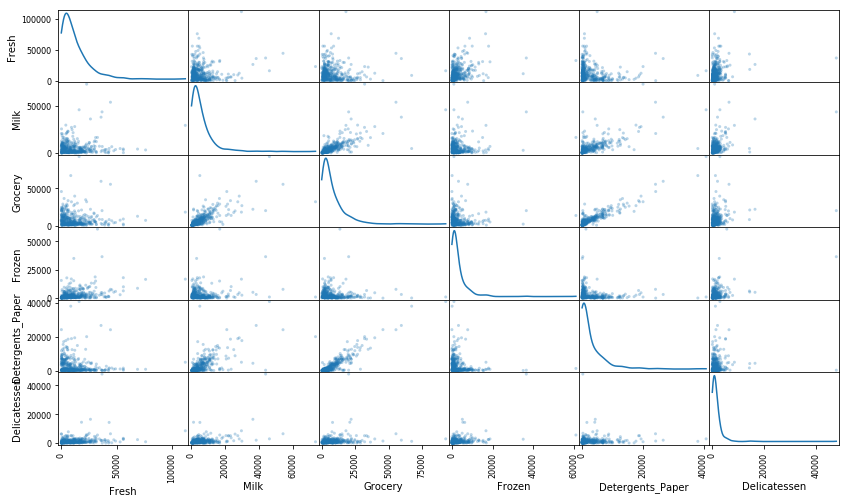

In [5]:
# Produza uma matriz de dispersão para cada um dos pares de atributos dos dados
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

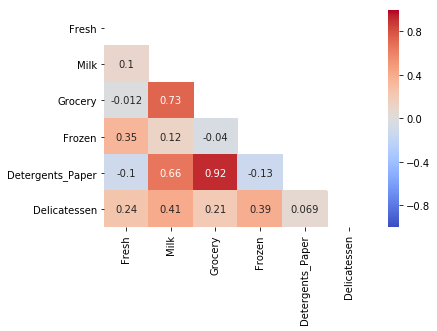

In [6]:
# Cria um gráfico do tipo heatmap demonstrando o índice de correlação entre os atributos
correlation = data.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, vmin=-1, vmax=1, cmap='coolwarm', annot=True, mask=mask);

### Questão 3:

- Usando a matriz de dispersão como referência, discuta a distribuição da base de dados. Elabore sua resposta considerando a normalidade, _outliers_, a grande quantidade de pontos próximo de 0 e outras coisas que julgar importante. Se necessário, você pode realizar outros plots para complementar sua explicação.
- Há algum par de atributos que mostra algum grau de correlação?
- Como isso confirma ou nega a suspeita sobre relevância do atributo que você tentou prever?
- Como os dados desses atributos são distribuidos?

**Dica:** Os dados são distribuídos normalmente? Onde a maioria dos pontos estão? Você pode usar [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) para ver a correlação dos atributos e visualiza-los utilizando um [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(os dados que alimentam o heatmap seriam as correlações, por exemplo `data.corr()`)

**Resposta:**

Observando primeiramente a distribuição dos atributos, dada pela diagonal principal da matriz de dispersão, notamos de modo geral um deslocamento dos dados para a esquerda. Isto acontece devido a presença de *outliers*, criando um efeito de cauda longa e afastando do formato clássico de uma distribuição normal.

Pela matriz de dispersão e corroborado pelo gráfico de mapa de calor, perecebemos uma correlação muito alta(**0.92**) entre a compra de secos e molhados (*grocery*) e itens de higiene e limpeza (*detergents/paper*). Os itens de secos e molhados também se relaciona fortemente (**0.73**) com lacticínios (*milk*). E os lacticínios, por sua vez, se relacionam de forma moderada (**0.66**) com os itens de higiene e limpeza. Percebemos que são três categorias bem correlacionadas.

Por outro lado, constatamos aqui que os itens perecíveis (*fresh*) se correlacionam pouco com os demais, apresentando uma relação fraca ou praticamente inexistente. Desta forma, como constatado na questão anterior, por apresentar pouca redundância de informação e por um dos itens mais vendidos, tendo um impacto significativo do ponto de vista de negócio, consideramos uma característica relevante para construção do nosso modelo.

## Pré-processamento de Dados
Nesta seção, você irá pré-processar os dados para criar uma melhor representação dos clientes ao executar um escalonamento dos dados e detectando os discrepantes. Pré-processar os dados é geralmente um passo fundamental para assegurar que os resultados obtidos na análise são importantes e significativos.

### Implementação: Escalonando Atributos
Se os dados não são distribuídos normalmente, especialmente se a média e a mediana variam significativamente (indicando um grande desvio), é quase sempre [apropriado](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) aplicar um escalonamento não linear – particularmente para dados financeiros. Uma maneira de conseguir escalonar dessa forma é utilizando o [ teste Box-Cox](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), que calcula o melhor poder de transformação dos dados, que reduzem o desvio. Uma abordagem simplificada que pode funcionar na maioria dos casos seria aplicar o logaritmo natural.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribua uma cópia dos dados para o `log_data` depois de aplicar um algoritmo de escalonamento. Utilize a função `np.log` para isso.
 - Atribua uma cópia da amostra do dados para o `log_samples` depois de aplicar um algoritmo de escalonamento. Novamente, utilize o `np.log`.

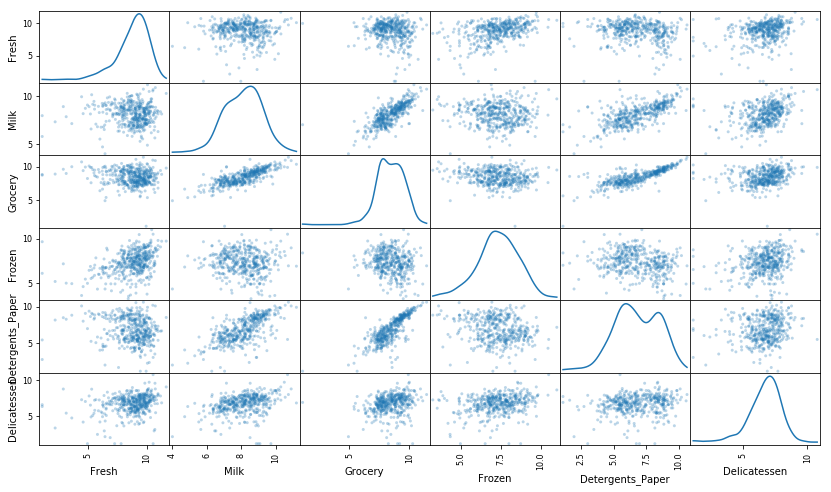

In [7]:
# TODO: Escalone os dados utilizando o logaritmo natural
log_data = np.log(data)

# TODO: Escalone a amostra de dados utilizando o logaritmo natural
log_samples = np.log(samples)

# Produza uma matriz de dispersão para cada par de atributos novos-transformados
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observação
Após aplicar o logaritmo natural para o escalonamento dos dados, a distribuição para cada atributo deve parecer mais normalizado. Para muitos pares de atributos, você vai precisar identificar anteriormente como sendo correlacionados, observe aqui se essa correlação ainda está presente (e se está mais forte ou mais fraca que antes).

Execute o código abaixo para ver como a amostra de dados mudou depois do algoritmo natural ter sido aplicado a ela.

In [8]:
# Mostre a amostra dados log-transformada
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,1.098612,5.808142,8.856661,9.655090,2.708050,6.309918


### Implementação: Detecção de valores atípicos (_Outlier_)
Identificar dados discrepantes é extremamente importante no passo de pré-processamento de dados de qualquer análise. A presença de discrepantes podem enviesar resultados que levam em consideração os pontos de dados. Há muitas "regras básicas" que constituem um discrepante em um conjunto de dados. Aqui usaremos [o Método Turco para identificar valores atípicos](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): Um *passo do discrepante* é calculado 1,5 vezes a variação interquartil (IQR). Um ponto de dados com um atributo que está além de um passo de um discrepante do IQR para aquele atributo, ele é considerado anormal.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir o valor do 25º percentil do atributo dado para o `Q1`. Utilizar `np.percentile` para isso.
 - Atribuir o valor do 75º percentil do atributo dado para o `Q3`. Novamente, utilizar `np.percentile`.
 - Atribuir o cálculo de um passo do discrepante do atributo dado para o `step`.
 - Remover opcionalmentos os pontos de dados do conjunto de dados ao adicionar índices à lista de `outliers`.

**NOTA:** Se você escolheu remover qualquer discrepante, tenha certeza que a amostra de dados não contém nenhum desses pontos!  
 Uma vez que você executou essa implementação, o conjunto de dado será armazenado na variável `good_data`!

In [9]:
outliers_index = []

# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in log_data.keys():
    
    # TODO: Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = 1.5 * (Q3 - Q1)
    
    # Seleciona os dados discrepantes
    log_data_features_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outliers_index.extend(log_data_features_outliers.index.values)
    
    # Mostre os discrepantes
    # print "Data points considered outliers for the feature '{}': {}".format(feature, len(log_data_features_outliers))
    # display(log_data_features_outliers)

# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
outliers  = []

# Remova os valores atí, caso nenhum tenha sido especificado
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Abaixo, listamos todos os índices de outliers encontrados, segundo a definição adotada, bem como aqueles que aparecem em mais de um atributo.

In [10]:
# Imprime os índices dos outliers de todos os atributos
print "Number of outliers in all features: " + str(len(set(outliers_index)))
print outliers_index

# Imprime somente aqueles que aparecem em mais de um atributo
duplicated_outliers_index = [item for item, count in collections.Counter(outliers_index).items() if count > 1]
print "\nNumber of duplicated outliers: " + str(len(duplicated_outliers_index))
print duplicated_outliers_index

Number of outliers in all features: 42
[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

Number of duplicated outliers: 5
[128, 154, 65, 66, 75]


Para facilitar nossas atividades de remoção de outliers para limpeza do *dataset*, criamos a função ***remove_outliers***.

In [11]:
def remove_outliers(data, outliers):
    """Remove a list of outliers from data.

    Parameters
    ----------
    data : pandas Dataframe object
        A dataframe with data to be cleaned.
    outliers : list
        A list of index outliers to be removed from data.

    Returns
    -------
    pandas Dataframe object
        Return a cleaned Dataframe object without defined outliers.
    """
    return data.drop(data.index[outliers]).reset_index(drop = True)

Uma métrica estatística interessante para avaliar a dispersão dos dados, bem como a presença e impacto de outliers no conjunto de dados é o **coeficiente de variação** (**CV**). Dado pela razão do desvio padrão pela média, o CV é uma métrica que indica o percentual de variação dos dados. Assim, quanto maior o percentual maior é a dispersão, a variação ou a heterogeneidade destes dados, podendo ultrapassar os 100%. Esta função nos ajudará a entender o impacto da remoção dos outliers do *dataset*.

In [12]:
def calculate_CV(data):
    """Calculate the coefficient of variation (CV) of dataframe.

    Parameters
    ----------
    data : pandas dataframe
        A dataframe with features to calculate the CV.

    Returns
    -------
    pandas Series object
        Return Series object with the CV from all features/columns.
    """
    # CV = standard deviation / mean
    return data.describe().loc['std']/data.describe().loc['mean']

Por fim, nesta etapa de avaliação dos outliers, criamos mais uma função que plota uma matriz de histogramas, permitindo a comparabilidade das ações de higienização dos dados. Para facilitar nossa leitura, incluímos anotações (*annotations*) com o coeficiente de variação nos gráficos.

In [13]:
def hist_matrix_plot(df_list, annot_list=False, annot=False):
    """Plot a matrix of histograms with annotations, if necessary.

    Parameters
    ----------
    df_list : list of pandas Dataframe object
        A list of Dataframes (df) to be plotted for comparasion. All df must have the same length of features.
    annot_list: list of pandas Series object
        A list of Series with annotations to be included in plot. 
        All Series must have the same length of features. Default = False.
    annot: bool
        A flag to define the insert of annotation. Set True to insert. Default = False. 

    Returns
    -------
    None
        This function plot the matrix histogram with annotations. At the end, returns None.
    """
    # Define the dimensions of matrix
    n_features = df_list[0].shape[1]
    n_dataframes = len(dataframes)
    
    # Create the subplots
    f, axes = plt.subplots(n_features, n_dataframes, figsize=(14, 10), sharex=True, sharey=True)
        
    # Plot the histograms
    for j in range(n_dataframes):
        axes[0, j].set_title("DataFrame %d" % j)
        for i in range(n_features):
            plot = sns.distplot( dataframes[j].iloc[:, i], ax=axes[i, j])
            
            # Include de annotations if annot was set as True and if there is a list of annotations 
            if annot and annot_list:
                axes[i, j].text(0, 0.35, "CV={:.2f}%".format(annot_list[j][i]*100), size='medium', color='black')
    
    return None

Com base nas funções criadas acima, realizamos uma comparação gráfica com histogramas e o cálculo dos coeficientes de variação para cada *feature* de cada conjunto de dados. No **DataFrame 0**, temos todos os dados sem qualquer remoção. No **DataFrame 1**, removemos somente as amostras que apresentaram outliers para mais de uma característica. Por fim, no **DataFrame 2**, removemos todos os outliers detectados. 

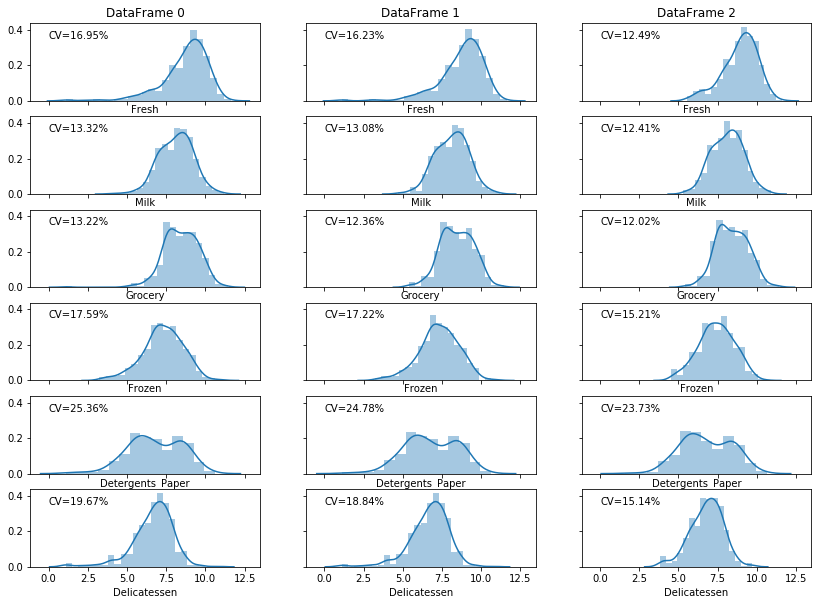

In [14]:
# Define os outliers a serem removidos
duplicated_outliers  = [128, 154, 65, 66, 75]
all_outliers  = [65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 
                 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 
                 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]

# Cria dois novos dataframes com a remoção dos outliers
good_data_without_duplicated_outliers = remove_outliers(log_data, duplicated_outliers)
good_data_without_all_outliers = remove_outliers(log_data, all_outliers)

# Calcula o CV de cada conjunto de dados
cv_log_data = calculate_CV(log_data)
cv_good_data_without_duplicated_outliers = calculate_CV(good_data_without_duplicated_outliers)
cv_good_data_without_all_outliers = calculate_CV(good_data_without_all_outliers)

# Agrupa os conjuntos de dados e CVs em listas de objetos
dataframes = [log_data, good_data_without_duplicated_outliers, good_data_without_all_outliers]
coef_variation = [cv_log_data, cv_good_data_without_duplicated_outliers, cv_good_data_without_all_outliers]

# Plota a matriz de histogramas
hist_matrix_plot(df_list=dataframes, annot_list=coef_variation, annot=True)

Após todas estas etapas de avaliação, decidimos remover os índices com outliers detectados em mais de uma característica. As justificativas se encontram na questão 4, logo abaixo.

In [15]:
# OPCIONAL: Selecione os índices dos pontos de dados que você deseja remover
outliers  = [128, 154, 65, 66, 75]

# Remova os valores atí, caso nenhum tenha sido especificado
good_data = remove_outliers(log_data, outliers)

### Questão 4
- Há alguns pontos de dado considerados discrepantes de mais de um atributo baseado na definição acima?
- Esses pontos de dados deveriam ser removidos do conjunto?
- Se qualquer ponto de dados foi adicionado na lista `outliers` para ser removido, explique por quê.

**Resposta:**

Com base na definição de outlier adotada, temos a ocorrência de 42 outliers no *dataset*, sendo que 5 deles aparecem em mais de um atributo. São os índices: 128, 154, 65, 66 e 75.

A presença de ruídos e outliers no conjunto de dados podem afetar significativamente os agrupamentos encontrados, sendo que cada algoritmo reage e trata de uma forma estas amostras. 

Obsevando os histogramas e coeficientes de variação (CVs), percebemos que os dados são naturalmente bem comportados. Com todas as amostras (**DataFrame 0**), notamos que os CVs variam em torno de 13% a 20%, somente os itens de higiene e limpeza que apresentam um CV em torno de 25%. Em algumas literaturas, como para Pimentel Gomes [4], a dispersão é considerada muito alta para valores superiores a 30%. Entre 10% e 20% a dispersão é média e entre 20% e 30%, ela é considerada alta.

Removendo as amostras que apresentam outliers em mais de um atributo (**DataFrame 1**), percebemos que os CVs não alteram muito, caindo em torno de 1% para os atributos. Fazendo uma remoção mais drástica, ou seja, removendo todos os outliers (**DataFrame 2**), percebemos que a alteração ainda não é tão significativa, reduzindo os CVs em torno de 2%. Somente no item de padaria e frios (*delicatessen*) que a redução é de aproximadamente 4%.

Com isso, notamos que em geral os atributos possuem distribuições com uma dispersão naturalmente média. A presença dos outliers não impactam em sobremedida a variação dos dados. Embora seja salutar higienizar a base de dados mitigando ruídos e outliers, este processo neste caso não precisa ser tão drástico.

Desta forma, com base em toda a análise supracitada, decidimos remover somente as 5 amostras que apresentam outliers em mais de um atributo, sendo uma remoção pequena, de apenas 1,1% da base. Por outro lado, se retirássemos todos os outliers, significaria uma remoção de 9,5% da base, uma quantidade considerável, sem um impacto tão significativo da dispersão.

## Transformação de Atributo
Nesta seção, você irá utilizar a análise de componentes principais (PCA) para elaborar conclusões sobre a estrutura subjacente de dados de clientes do atacado. Dado que ao utilizar a PCA em conjunto de dados calcula as dimensões que melhor maximizam a variância, nós iremos encontrar quais combinações de componentes de atributos melhor descrevem os consumidores.

### Implementação: PCA

Agora que os dados foram escalonados em uma distribuição normal e qualquer discrepante necessário foi removido, podemos aplicar a PCA na `good_data` para descobrir qual dimensão dos dados melhor maximizam a variância dos atributos envolvidos. Além de descobrir essas dimensões, a PCA também irá reportar a *razão da variância explicada* de cada dimensão – quanta variância dentro dos dados é explicada pela dimensão sozinha. Note que o componente (dimensão) da PCA pode ser considerado como um novo "feature" do espaço, entretanto, ele é uma composição do atributo original presente nos dados.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Importar o `sklearn.decomposition.PCA` e atribuir os resultados de ajuste da PCA em seis dimensões com o `good_data` para o `pca`.
 - Aplicar a transformação da PCA na amostra de log-data `log_samples` utilizando `pca.transform`, e atribuir os resultados para o `pca_samples`.

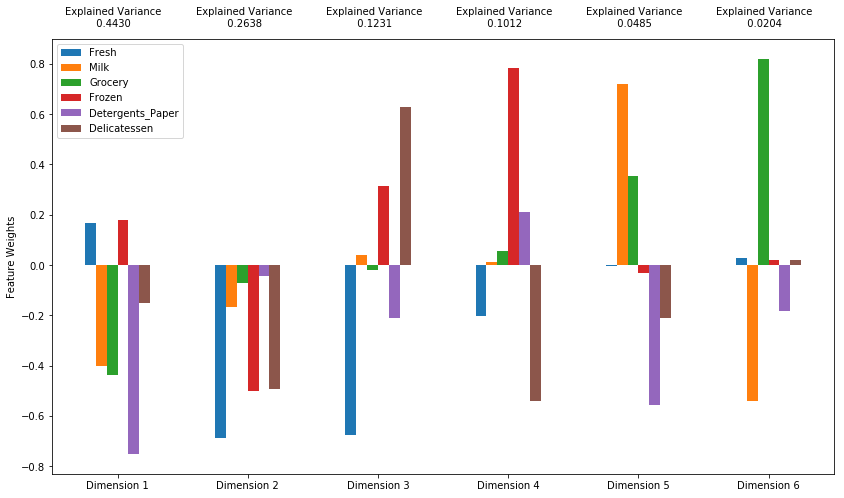

In [16]:
from sklearn.decomposition import PCA

# TODO: Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=6).fit(good_data)

# TODO: Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(log_samples)

# Gere o plot dos resultados da PCA
pca_results = vs.pca_results(good_data, pca)

Calculamos e adicionamos ao DataFrame **pca_results** o valor de variância explicada acumulada (*Cumulated Exp. Variance*), de modo que podemos observar o impacto na variância explicada com a adição gradativa das dimensões.

In [17]:
pca_results['Cumulated Exp. Variance'] = pca_results['Explained Variance'].cumsum()
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Cumulated Exp. Variance
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499,0.4430
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941,0.7068
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286,0.8299
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423,0.9311
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092,0.9796
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197,1.0000


Uma famosa forma de visualizar o resultado de uma decomposição por PCA é o gráfico biplot, também chamado de gráfico de carregamento. Abaixo implementamos uma função que cria este gráfico, avaliando a relação das duas principais dimensões criadas pela transformação.

In [18]:
def biplot(pc_data, pca, labels=None):
    """Create a biplot or loading chart to visualize the impact of features
    in two main PCs (Principal Components).
     
    Based in the issue: 
    https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

    Parameters
    ----------
    pc_data : numpy array
        The data transformed by pca
    pca : PCA sklearn object
        The data passed to fit in a PCA object
    labels: list
        List of features names to plot in loading chart

    Returns
    -------
    None
        This fuction create a loading plot. At the end, returns None.
    """
    xs = pc_data[:,0]
    ys = pc_data[:,1]
    coeff = np.transpose(pca.components_[0:2, :])
    
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.figure(figsize=(12,10))
    plt.scatter(xs*scalex, ys*scaley, color='gray', alpha=0.2)
    
    ax = plt.gca()
    for i in [0.1, 0.25, 0.5, 0.75]:
        circle = plt.Circle((0,0), i, color='k', fill=False, alpha=0.1)
        ax.add_artist(circle)
    
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='blue', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]*1.1, 
                     coeff[i,1]*1.1, 
                     "Var" + str(i+1),
                     color='black', 
                     ha='center', 
                     va='center')
        else:
            plt.text(coeff[i,0]*1.1, 
                     coeff[i,1]*1.1, 
                     labels[i] + "\n" + "{:.2f}%".format(np.linalg.norm([coeff[i,0], coeff[i,1]])*100),
                     color = 'black', 
                     ha = 'center', 
                     va = 'center')
            
    plt.xlim(-1,1)
    plt.ylim(-0.85,0.85)
    plt.xlabel("Dimension 1 ({:.2f}% explained var.)".format(pca.explained_variance_ratio_[0]*100))
    plt.ylabel("Dimension 2 ({:.2f}% explained var.)".format(pca.explained_variance_ratio_[1]*100))
    plt.title("Loading Plot", fontsize=20)
    plt.xticks([])
    plt.yticks([])
    
    return None

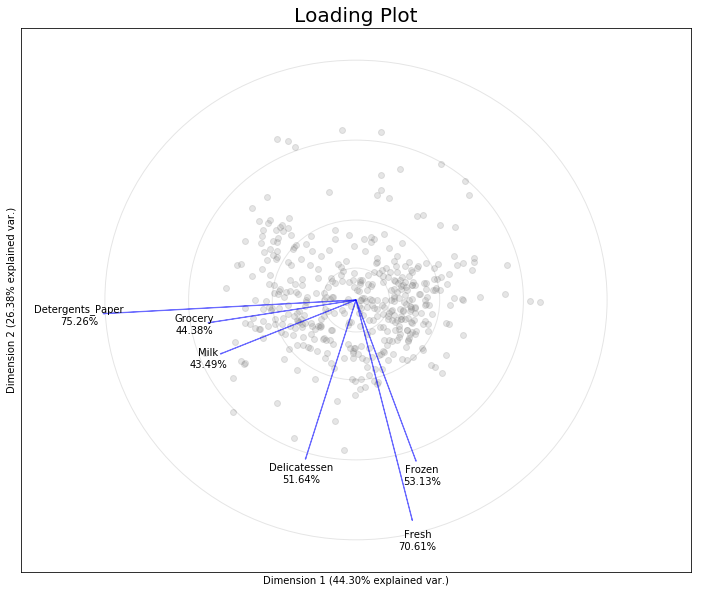

In [19]:
pc_data = pca.transform(good_data)

#Call the function. Use only the 2 PCs.
biplot(pc_data, pca, log_data.columns)
plt.show()

### Questão 5
- Quanta variância nos dados é explicada **no total** pelo primeiro e segundo componente principal?
- Quanta variância nos dados é explicada pelos quatro primeiros componentes principais?
- Utilizando a visualização fornecida acima, discuta quais das quatro primeiras dimensões que melhor representam em termos de despesas dos clientes. Explique qual das quatro representa melhor em termos de consumo dos clientes.

**Dica:** Uma melhora positiva dentro de uma dimensão específica corresponde a uma *melhora* do atributos de *pesos-positivos* e uma *piora* dos atributos de *pesos-negativos*. A razão de melhora ou piora é baseada nos pesos de atributos individuais.

**Resposta:**

Os dois primeiros componentes principais explicam cerca de 70.7% da variância dos dados, enquanto que os quatro primeiros explicam em torno de 93.1%.

A **primeira dimensão** ou **primeiro componente principal** explica 44.3% da variância dos dados. Ele é em maior medida afetado pelos gastos em higiene e limpeza (*Detergents_Paper*), seguido por laticínios (*Milk*) e secos e molhados (*grocery*), e em menor medida pelos demais itens. Um aspecto interessante do nosso primeiro componente principal, como pode ser observado no gráfico de carregamento ou biplot, é que os três principais atributos supracitados possuem um grande aproximação de seus eixos, indicando uma alta correlação entre estas variáveis. Isto confirma a relação encontrada e explicitada na questão 3 deste documento.

O **segundo componente principal** explica cerca de 26.4% da variância. Os itens que mais contribuem para esta dimensão são os perecíveis (*fresh*), os congelados (*frozen*) e os de padaria e frios (*delicatessen*), sendo os perecíveis aqueles com o maior impacto. É interessante notar que os principais itens dessa dimensão são ortogonais aos itens da dimensão anterior, denotando a baixa relação entre estes produtos com os da dimensão 1.

O **terceiro componente principal** explica em torno de 12.3% da variância, sendo os perecíveis (*fresh*) e os produtos de padaria e frios (*delicatessen*) como aqueles mais representativos desta dimensão. Contudo, estes itens são diametralmente opostos, indicando que eles são inversamente correlacionados nesta dimensão, ou seja, quem geralmente compra mais de um produto, tende a comprar menos de outro.

A **quarta dimensão** explica aproximadamente 10.1% da variância. Deste componente, os itens de congelados (*frozen*) são os mais impactantes, seguidos pelos itens de padaria e frios (*delicatessen*). Nesta dimensão, estes itens são inversamente correlacionados.

### Observação
Execute o código abaixo para ver como a amostra de log transformado mudou depois de receber a transformação da PCA aplicada a ele em seis dimensões. Observe o valor numérico para as quatro primeiras dimensões para os pontos da amostra. Considere se isso for consistente com sua interpretação inicial dos pontos da amostra.

In [20]:
# Exiba a amostra de log-data depois de aplicada a tranformação da PCA
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,6.6170,6.5320,-1.3364,-0.6495,-0.4424,-0.0146
1,-2.1899,-4.8605,0.0008,0.4827,0.5041,-0.1988
2,3.0206,4.8169,6.4519,2.7403,0.7788,2.1415


### Implementação: Redução da Dimensionalidade
Ao utilizar um componente principal de análise, um dos objetivos principais é reduzir a dimensionalidade dos dados – na realidade, reduzindo a complexidade do problema. Redução de dimensionalidade tem um custo: Poucas dimensões utilizadas implicam em menor variância total dos dados que estão sendo explicados. Por causo disso, a *taxa de variância explicada cumulativa* é extremamente importante para saber como várias dimensões são necessárias para o problema. Além disso, se uma quantidade significativa de variância é explicada por apenas duas ou três dimensões, os dados reduzidos podem ser visualizados depois.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Atribuir os resultados de ajuste da PCA em duas dimensões com o `good_data` para o `pca`.
 - Atribuir a tranformação da PCA do `good_data` utilizando `pca.transform`, e atribuir os resultados para `reduced_data`.
 - Aplicar a transformação da PCA da amostra do log-data `log_samples` utilizando `pca.transform`, e atribuindo os resultados ao `pca_samples`.

In [21]:
# TODO: Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=2).fit(good_data)

# TODO: Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# TODO: Transforme a amostre de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(log_samples)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observação
Execute o código abaixo para ver como a amostra de dados do log-transformado mudou depois de receber a transformação do PCA aplicada a ele em apenas duas dimensões. Observe como os valores das duas primeiras dimensões permanessem constantes quando comparados com a transformação do PCA em seis dimensões.

In [22]:
# Exiba a amostra de log-data depois de aplicada a transformação da PCA em duas dimensões
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,6.6170,6.5320
1,-2.1899,-4.8605
2,3.0206,4.8169


## Visualizando um Biplot
Um biplot é um gráfico de dispersão onde cada ponto é representado por sua pontuação junto das componentes principais. Os eixos são as componentes principais (nesse caso, `Dimension 1` e `Dimenson 2`). Além disso, o biplot mostra a projeção dos atributos originais junto das componentes. Um biplot pode nos ajudar a interpretar a redução da dimensionalidade dos dados e descobrir relacionamentos entre as componentes principais e os atributos originais.

Execute a célula abaixo para produzir um biplot com os dados de dimensionalidade reduzida.

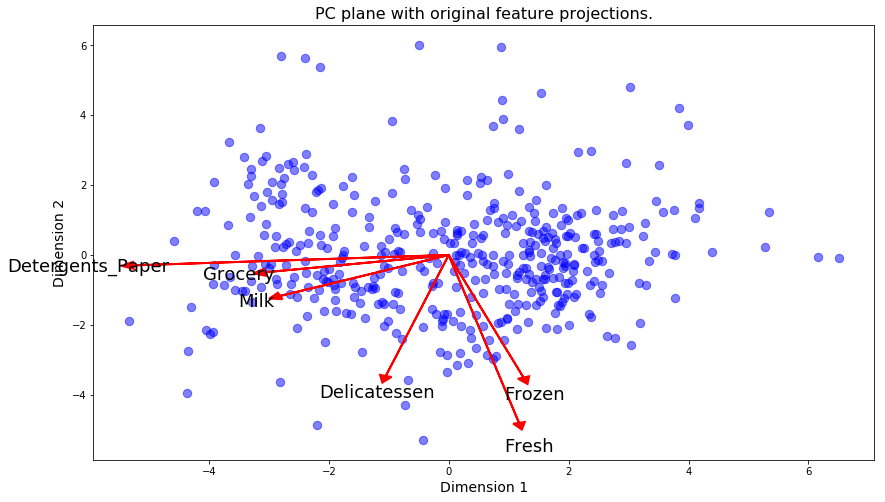

In [23]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca);

## Clustering

Nesta seção, você irá escolher utilizar entre o algoritmo de clustering K-Means ou o algoritmo de clustering do Modelo de Mistura Gaussiano para identificar as várias segmentações de clientes escondidos nos dados. Então você irá recuperar pontos de dados específicos do cluster para entender seus significados ao transformá-los de volta em suas dimensões e escalas originais. 

### Questão 6
- Quais são as vantagens de utilizar o algoritmo de clustering K-Means?
- Quais são as vantagens de utilizar o algoritmo de clustering do Modelo de Mistura Gaussiano?
- Dadas as suas observações até agora sobre os dados de clientes da distribuidora, qual dos dois algoritmos você irá utilizar e por quê.

**Dica: **Pense na diferença entre os clusters mais próximos ou mais isolados.

**Resposta:**

Dos algoritmos de agrupamento, o K-Means é um dos mais populares e utilizados. Uma de suas principais vantagens é a sua eficiência computacional, sendo facilmente escalável para grandes conjuntos de dados e com alta dimensionalidade. Este método cria agrupamentos circulares, esféricos ou hiperesféricos de mesmo tamanho de acordo com a k quantidade de clusters definidos, assumindo que cada ponto pertence a um grupo específico. Estas características tornam o método mais intuitivo e fácil de ser entendido ou explicado.

Por outro lado, o Modelo de Mistura de Gaussianas (GMM) é mais flexível quanto a forma ou distribuições dos pontos (amostras) no hiperespaço. Enquanto K-Means delimita o espaço esfericamente, o GMM não assume nenhuma geometria específica, avaliando as amostras quanto a sua distribuição. Outra característica interessante é que o método não define fortemente a que grupo um ponto pertence, mas ele descreve estas classificações em termos de probabilidades. Desta forma, todos os pontos com alguma probabilidade podem pertencer a qualquer grupo. Estas características tornam o método altamente flexível, mas é menos intuitivo e requer uma base matemática mais acurada para sua compreensão.

Devido a sua flexibilidade iremos escolher o método GMM. Embora o K-Means seja computacionalmente mais eficiente, nosso *dataset* possui poucas amostras e com poucas dimensões. Desta forma, performance não é nossa maior preocupação.

### Implementação: Criando Clusters
Dependendo do problema, o número de clusters que você espera que estejam nos dados podem já ser conhecidos. Quando um número de clusters não é conhecido *a priori*, não há garantia que um dado número de clusters melhor segmenta os dados, já que não é claro quais estruturas existem nos dados – se existem. Entretanto, podemos quantificar a "eficiência" de um clustering ao calcular o *coeficiente de silhueta* de cada ponto de dados. O [coeficiente de silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) para um ponto de dado mede quão similar ele é do seu cluster atribuído, de -1 (não similar) a 1 (similar). Calcular a *média* do coeficiente de silhueta fornece um método de pontuação simples de um dado clustering.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Ajustar um algoritmo de clustering para o `reduced_data` e atribui-lo ao `clusterer`.
 - Prever o cluster para cada ponto de dado no `reduced_data` utilizando o `clusterer.predict` e atribuindo eles ao `preds`.
 - Encontrar os centros do cluster utilizando o atributo respectivo do algoritmo e atribuindo eles ao `centers`.
 - Prever o cluster para cada amostra de pontos de dado no `pca_samples` e atribuindo eles ao `sample_preds`.
 - Importar sklearn.metrics.silhouette_score e calcular o coeficiente de silhueta do `reduced_data` contra o do `preds`.
   - Atribuir o coeficiente de silhueta para o `score` e imprimir o resultado.

In [24]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

n_components = 2

# TODO: Aplique o algoritmo de clustering de sua escolha aos dados reduzidos
clusterer = GaussianMixture(n_components=n_components).fit(reduced_data)

# TODO: Preveja o cluster para cada ponto de dado
preds = clusterer.predict(reduced_data)

# TODO: Ache os centros do cluster
centers = clusterer.means_

# TODO: Preveja o cluster para cada amostra de pontos de dado transformados
sample_preds = clusterer.predict(pca_samples)

# TODO: Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
score = silhouette_score(reduced_data, preds)

print "For %d clusters" % n_components
print "Score: {:.4f}".format(score)

For 2 clusters
Score: 0.4219


### Questão 7
- Reporte o coeficiente de silhueta para vários números de cluster que você tentou.
- Dentre eles, qual a quantidade de clusters que tem a melhor pontuação de silhueta?

**Resposta:**

O melhor resultado para o coeficiente de silhueta ocorre com **2 clusters**, com um **score de 0.4223**.

**Quantidade de clusters e Score**
* 2 clusters: 0.4223
* 3 clusters: 0.4042
* 4 clusters: 0.2933
* 5 clusters: 0.3005
* 6 clusters: 0.3261
* 7 clusters: 0.3242
* 8 clusters: 0.2965
* 9 clusters: 0.3072
* 10 clusters: 0.3104
* 13 clusters: 0.3083
* 20 clusters: 0.2952
* 35 clusters: 0.2983

### Visualização de Cluster
Uma vez que você escolheu o número ótimo de clusters para seu algoritmo de clustering utilizando o método de pontuação acima, agora você pode visualizar os resultados ao executar o bloco de código abaixo. Note que, para propósitos de experimentação, é de bom tom que você ajuste o número de clusters para o seu algoritmo de cluster para ver várias visualizações. A visualização final fornecida deve, entretanto, corresponder com o número ótimo de clusters. 

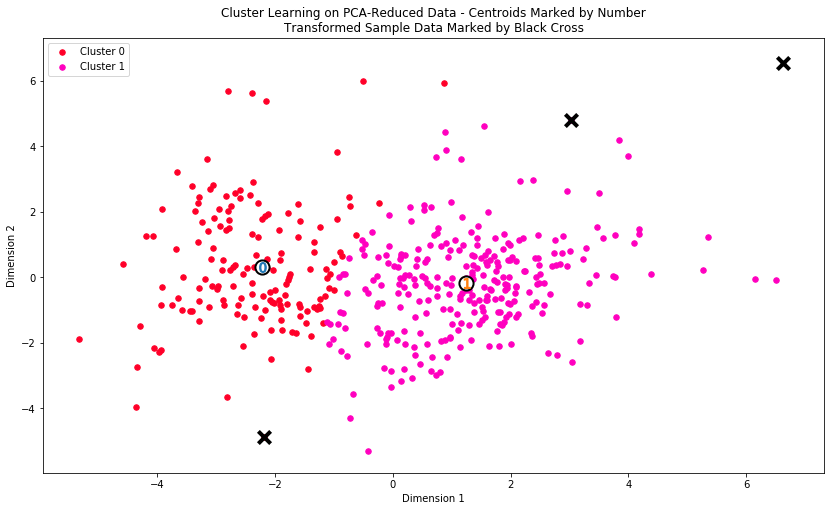

In [25]:
# Mostre os resultados do clustering da implementação
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementação: Recuperação de Dados
Cada cluster apresentado na visualização acima tem um ponto central. Esses centros (ou médias) não são especificamente pontos de dados não específicos dos dados, em vez disso, são *as médias* de todos os pontos estimados em seus respectivos clusters. Para o problema de criar segmentações de clientes, o ponto central do cluster corresponde *a média dos clientes daquele segmento*. Já que os dados foram atualmente reduzidos em dimensões e escalas por um algoritmo, nós podemos recuperar a despesa representativa do cliente desses pontos de dados ao aplicar transformações inversas.

No bloco de código abaixo, você vai precisar implementar o seguinte:
 - Aplicar a transformação inversa para o `centers` utilizando o `pca.inverse_transform`, e atribuir novos centros para o `log_centers`.
 - Aplicar a função inversa do `np.log` para o `log_centers` utilizando `np.exp`, e atribuir os verdadeiros centros para o `true_centers`.


In [26]:
# TODO: Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# TODO: Exponencie os centros
true_centers = np.exp(log_centers)

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3552.0,7837.0,12219.0,870.0,4696.0,962.0
Segment 1,8953.0,2114.0,2765.0,2075.0,353.0,732.0


In [27]:
# Obtém a mediana dos dados
median = data.describe().loc['50%']

# Calcula razão dos gastos dos pontos centrais pela mediana
segment_median_ratio = true_centers / median
segment_median_ratio

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,0.417686,2.160739,2.569446,0.570118,5.751378,0.996375
Segment 1,1.052799,0.582851,0.581432,1.359764,0.432333,0.758156


### Questão 8
- Considere o gasto total de compra de cada categoria de produto para os pontos de dados representativos acima e reporte a descrição estatística do conjunto de dados no começo do projeto. Qual conjunto de estabelecimentos cada segmentação de clientes representa?

**Dica:** Um cliente que é atribuído ao `'Cluster X'` deve se identificar melhor com os estabelecimentos representados pelo conjunto de atributos do `'Segment X'`. Pense no que cada segmento representa em termos do ponto de atributo escolhido.

**Resposta:**

Observamos que o **segmento 0** possui gastos superiores em produtos perecíveis (*fresh*) e congelados (*frozen*). Assim, imaginamos que se tratam de clientes como bares, restaurantes, hotéis ou buffets de eventos.

No **segmento 1** percebemos ao contrário, que os gastos são superiores em laticínios (*milk*), secos e molhados (*grocery*), higiene e limpeza (*detergents_paper*) e padaria e frios (*delicatessen*). Com isso, podemos supor que estes clientes sejam mercearias, supermercados ou varejistas.

### Questão 9
- Para cada amostra de ponto, qual segmento de cliente da **Questão 8** é melhor representado?
- As previsões para cada amostra de ponto são consistentes com isso?

Execute o bloco de códigos abaixo para saber a previsão de segmento para cada amostra de ponto.

In [28]:
# Mostre as previsões
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


In [29]:
print "Dados de amostra"
display(samples)

# Calcula razão dos gastos das amostras pela mediana
samples_median_ratio = samples / median
print "\nDados de amostra - Razão dos gastos pela mediana"
display(samples_median_ratio)

Dados de amostra


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,622,55,137,75,7,8
1,112151,29627,18148,16745,4948,8550
2,3,333,7021,15601,15,550



Dados de amostra - Razão dos gastos pela mediana


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.073142,0.015164,0.028809,0.049148,0.008573,0.008286
1,13.188029,8.168459,3.816213,10.973132,6.060012,8.855515
2,0.000353,0.091811,1.476396,10.223460,0.018371,0.569653


**Resposta:**

Os dados de amostra que escolhemos no início deste trabalho talvez não sejam os melhores exemplos para análise de cluster, pois apresentam comportamentos de compra discrepantes da maioria das amostras. Por outro lado, oferecem uma perspectiva e um desafio interessante de análise.

O **ponto 0** e o **ponto 2** foram previstos como sendo do **cluster 0**, ou seja, aqueles que possuem um comportamento de compra superior em perecíveis (*fresh*) e congelados (*frozen*). 

Primeiramente o **ponto 0** possui um perfil de gastos muito abaixo da mediana em todos os produtos, contudo, os itens com este cliente mais gasta são justamente os perecíveis e os congelados. Desta forma faz sentido este cliente ser segmentado como do **cluster 0**. Isto confirma nossa hipótese inicial que poderia se tratar de um bar ou um pequeno restaurante.

O **ponto 2** possui um baixo gasto com perecíveis, mas muito elevado com congelados, quase 10 vezes maior que a mediana. Além disso, possui um gasto significativo com secos e molhados (*grocery*), sendo cerca de 47% superior a mediana. Supomos que devido esse desequilibrio tão elevado na compra de congelados, o nosso cliente se aproxima do centro do **cluster 0**, sendo segmentado então enquanto tal. Nossa hipótese inicial é de que se trataria de varejista especializado em congelados, o que é bastante comum no Brasil, mas a predição aproxima mais nosso cliente de um bar, hotel ou restaurante, o que faz muito sentido após a bateria de análises que desenvolvemos neste trabalho.

Por fim, o **ponto 1** foi prevista como sendo do **cluster 1**, ou seja, aqueles que possuem um comportamento de compra superior em laticínios (*milk*), secos e molhados (*grocery*) e higiene e limpeza (*detergents_papers*). Esta é outra amostra fora da curva e um pouco polêmico para a nossa análise, pois todos gastos são muito superiores que a mediana. Embora seu perfil de compra aponte os maiores gastos em perecíveis e congelados, sendo classificado como pertencente ao **cluster 1**, seria compreensível se o algoritmo o classificasse como pertencente ao **cluster 0**, já que este perfil se encontra no limiar entre os 2 grupos.

## Conclusão

Nesta seção final, você irá investigar maneiras de fazer uso dos dados que estão em clusters. Primeiro você vai considerar quais são os diferentes grupos de clientes, a **segmentação de clientes**, que pode ser afetada diferentemente por um esquema de entrega específico. Depois, você vai considerar como dar um rótulo para cada cliente (qual *segmento* aquele cliente pertence), podendo fornecer atributos adicionais sobre os dados do cliente. Por último, você vai comparar a **segmentação de clientes** com uma variável escondida nos dados, para ver se o cluster identificou certos tipos de relação.

### Questão 10
Empresas sempre irão executar os [testes A/B](https://en.wikipedia.org/wiki/A/B_testing) ao fazer pequenas mudanças em seus produtos ou serviços para determinar se ao fazer aquela mudança, ela afetará seus clientes de maneira positiva ou negativa. O distribuidor de atacado está considerando mudar seu serviço de entrega de atuais 5 dias por semana para 3 dias na semana. Mas o distribuidor apenas fará essa mudança no sistema de entrega para os clientes que reagirem positivamente.
- Como o distribuidor de atacado pode utilizar a segmentação de clientes para determinar quais clientes, se há algum, que serão alcançados positivamente à mudança no serviço de entrega?

**Dica:** Podemos supor que as mudanças afetam todos os clientes igualmente? Como podemos determinar quais grupos de clientes são os mais afetados?

**Resposta:**

Podemos supor que os clientes que compram muitos produtos perecíveis serão os mais afetados negativamente por essa mudança no serviço de entrega e que, segundo o nosso modelo, seriam aqueles pertencentes ao cluster 0.

Mas a melhor forma de realmente sabermos e entendermos a reação dos clientes diante de mundanças em nossos serviços e produtos é testando. Uma proposta para realização dos testes é obtendo amostras próximas dos pontos centrais de cada cluster, ou seja, conjuntos de pontos bem representativos de cada segmento. A partir deles, podemos avaliar a reação dos clientes diante de mudanças incrementais em nossos produtos e serviços, fornecendo *insights* importantes para decisões do que manter e do mudar.

### Questão 11
A estrutura adicional é derivada dos dados não rotulados originalmente quando utilizado as técnicas de clustering. Dado que cada cliente tem um **segmento de cliente** que melhor se identifica (dependendo do algoritmo de clustering aplicado), podemos considerar os *segmentos de cliente* como um **atributo construído (engineered)** para os dados. Assumindo que o distribuidor de atacado adquiriu recentemente dez novos clientes e cada um deles forneceu estimativas dos gastos anuais para cada categoria de produto. Sabendo dessas estimativas, o distribuidor de atacado quer classificar cada novo cliente em uma **segmentação de clientes** para determinar o serviço de entrega mais apropriado.  
- Como o distribuidor de atacado pode rotular os novos clientes utilizando apenas a estimativa de despesas com produtos e os dados de **segmentação de clientes**.

**Dica:** Um aprendiz supervisionado pode ser utilizado para treinar os clientes originais. Qual seria a variável alvo?

**Resposta:**

Para rotular novos clientes tendo como base seu perfil de compras, podemos treinar um algoritmo de aprendizado supervisionado como regressão logística ou árvores de decisão utilizando os dados de despesas como variáveis de entrada e a classificação ou segmento como rótulo.

### Visualizando Distribuições Subjacentes

No começo deste projeto, foi discutido que os atributos `'Channel'` e `'Region'` seriam excluídos do conjunto de dados, então as categorias de produtos do cliente seriam enfatizadas na análise. Ao reintroduzir o atributo `'Channel'` ao conjunto de dados, uma estrutura interessante surge quando consideramos a mesma redução de dimensionalidade da PCA aplicada anteriormente no conjunto de dados original.

Execute o código abaixo para qual ponto de dados é rotulado como`'HoReCa'` (Hotel/Restaurante/Café) ou o espaço reduzido `'Retail'`. Al´´em disso, você vai encontrar as amostras de pontos circuladas no corpo, que identificará seu rótulo.

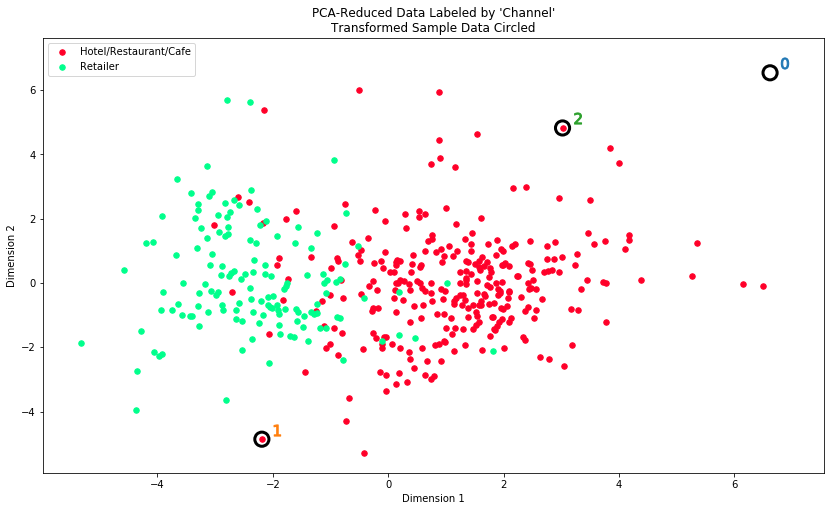

In [30]:
# Mostre os resultados do clustering baseado nos dados do 'Channel'
vs.channel_results(reduced_data, outliers, pca_samples)

### Questão 12
- Quão bom é o algoritmo de clustering e o números de clusters que você escolheu comparado a essa distribuição subjacente de clientes de Hotel/Restaurante/Café a um cliente Varejista?
- Há segmentos de clientes que podem ser classificados puramente como 'Varejistas' ou 'Hotéis/Restaurantes/Cafés' nessa distribuição?
- Você consideraria essas classificações como consistentes comparada a sua definição de segmentação de clientes anterior?*

**Resposta:**

O algortimo de clustering GMM se ajustou muito bem aos dados, apresentando uma boa generalização. Percebemos que quanto mais próximos das extremidades esquerda (*varejistas*) e direita (*hotéis, restaurantes e cafés*), mais puros eles podem ser considerados ou classificados.

De modo geral, as classificações e predições do nosso algoritmo tiveram boa perfomance. Em nossa hipótese inicial, o ponto 0 poderia ser um bar, uma pequena empresa ou restaurante, o que se mostrou verdadeiro no decorrer do trabalho e observando o atributo *channel* do conjunto de dados. 

O ponto 1 apresentava o alto volume de despesas em todos os atributos, levando-nos a suposição de que se travava de um grande varejista. O nosso algoritmo também classificou este cliente como varejo, contudo observamos que na verdade se tratava de um hotel/restaurante/café. É um erro, mas isto não nos preocupa muito, já que esta amostra possui um perfil de compra muito atípico e sua localização no espaço daria margem para entendermos como um varejo.

Modelos com alguma margem de erro é normal. Nossa preocupação seria maior se o modelo estivesse acertando todos os pontos (*overfitting*) ou errando muitos. Contudo, graficamente observamos que ele tem apresenta uma boa generalização. O que fica pendente, em termos de visão e decisão de negócio, seria definir o quanto é aceitável essa margem de erro.

Quanto ao ponto 2, avaliamos que poderia ser um varejo especializado na comercialização de congelados (*frozen*) devido a sua desproporcional despesa com este item, o que é comum no Brasil. Contudo nosso modelo e a sua classificação real mostra que na verdade se trata de um hotel/restaurante/café, o que faz muito sentido. Este resultado nos deixa mais confiantes sobre o modelo, pois ele apresentou uma relação que não conseguimos observar inicialmente devido ao nosso pouco conhecimento no começo da análise, mas que foi amadurecendo com o decorrer dela.

Desta forma concluímos que estamos muitos satisfeitos com os resultados, o algoritmo apresentou bom ajuste e generalização. Talvez a nossa escolha inicial dos dados de amostra não tenha sido a mais feliz, pois foram selecionados pontos com perfis de despesas muito atípicos, mas que rendeu bons *insights* e análises. Para este trabalho três pontos de amostras foi uma quantidade razoável, mas para trabalhos futuros e mais complexos avaliamos que seria importante termos mais amostras para análise, selecionando uma miscelância com um perfil estatístico mais variado, ou seja, contendo não apenas amostras com dados atípicos mas também com dados mais bem definidos ou comportados, situados mais próximos da média ou mediana.

> **Nota**: Uma vez que você completou todas as implementações de código e respondeu todas as questões acima com êxito, você pode finalizar seu trabalho exportando um iPython Notebook como um documento HTML. Você pode fazer isso utilizando o menu acima e navegando até  
**File -> Download as -> HTML (.html)**. Inclua o documento finalizado junto com esse Notebook para o seu envio.

## Referências Bibliográficas

1. [Feature Selection via Correlation Coefficient Clustering](https://pdfs.semanticscholar.org/c526/a3ecc5cb85fd0dc32cf8f2e0c8e057cf85a7.pdf)
2. [Seaborn documentation](https://seaborn.pydata.org/)
3. [Matplotlib documentation](https://matplotlib.org/)
4. Pimentel Gomes, F. Curso de Estatística Experimental. São Paulo: Nobel. 1985.
5. [k-means clustering with outlier removal](https://www.dshunks.com/publication/gan2017kmor.pdf)
6. [Issue: What is the meaning of negative values in components from PCA analysis?](https://www.researchgate.net/post/What_is_the_meaning_of_negative_values_in_components_from_PCA_analysis)
7. [Issue: What does negative factor loading imply in PCA?](https://www.researchgate.net/post/What_does_negative_factor_loading_imply_in_PCA)
8. [Clustering - Differences between clustering algorithms](https://www.thelearningmachine.ai/clustering)